In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

data = pd.read_excel('../data/olincourseenrollment0214.xlsx')

/home/isaac/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
data.head()

,status,grad_class,id,semester,sex,grade,major_main,major_sub,code,Unnamed: 9,course_main,course_sub,professor
0,GRAD,2007,602,0304FA,M,FF,Undeclared,NaN,AHS1101,2,History and Society,Bodies in Motion: Migration...,"Fleischmann, Fritz"
1,GRAD,2007,602,0304FA,M,FF,Undeclared,NaN,FND1210,1,Physical Foundations ofEngineering I,NaN,"Zastavker, Yevgeniya"
2,GRAD,2007,602,0304FA,M,FF,Undeclared,NaN,FND1312,1,Mathematical Foundations ofEngineering I: Calc...,NaN,"Tilley, Burt S."
3,GRAD,2007,602,0304FA,M,FF,Undeclared,NaN,FND1410,1,Foundations of EngineeringProject I,Mechanical Nature,"Linder, Benjamin"
4,GRAD,2007,602,0304FA,M,FF,Undeclared,NaN,FND1510,3,Intro to Modeling & Control,NaN,"Pratt, Gill"


### How many students are in the data set?

In [3]:
num_students = len(data.groupby('id').groups)
print "Number of students: %d" % num_students

Number of students: 980


### How many students are in each graduating class?

In [4]:
grad_class_sizes = data.groupby('grad_class').id.nunique()
print grad_class_sizes
print type(grad_class_sizes)

grad_class
0       403
2006     64
2007     71
2008     62
2009     62
2010     84
2011     89
2012     69
2013     76
Name: id, dtype: int64
<class 'pandas.core.series.Series'>


**TODO:** What is the graduating class of year 0?

/home/isaac/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


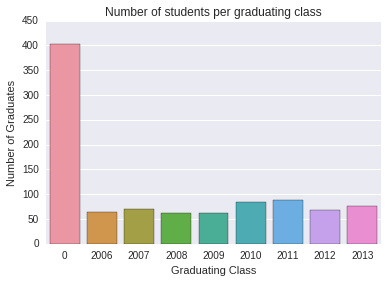

In [5]:
x = grad_class_sizes.index.values
y = grad_class_sizes.values

sns.barplot(x, y)
plt.xlabel('Graduating Class')
plt.ylabel('Number of Graduates')
plt.title('Number of students per graduating class')
plt.show()

### How many students are in each major?

In [6]:
declared = data[(data.major_main != 'Undeclared') & (data.major_main != 'Exchange Student')]
major_size = declared.groupby('major_main').id.nunique()
print major_size

major_main
Electr'l & Computer Engr    286
Engineering                 366
Mechanical Engineering      285
Name: id, dtype: int64


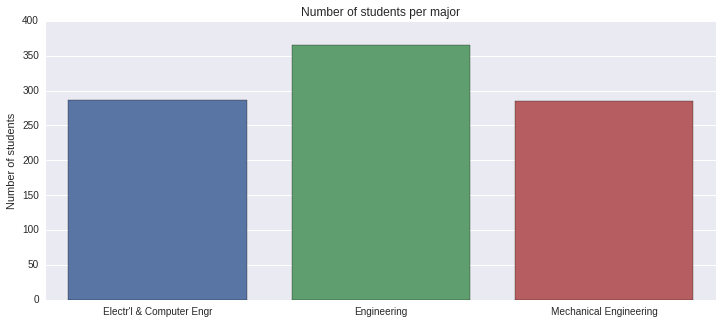

In [7]:
x = major_size.index.values
y = major_size.values

plt.figure(figsize=(12, 5))
sns.barplot(x, y)
plt.ylabel('Number of students')
plt.title('Number of students per major')
plt.show()

### Which courses are most popular?

In [8]:
course_sizes = data.groupby('course_main').size()
sorted_course_sizes = course_sizes.sort_values(ascending=False)
print sorted_course_sizes[:10]

course_main
Modeling and Simulation of thePhysical World             1026
Design Nature                                             829
Principles of Modern Biologywith Lab                      829
Principles of Engineering                                 777
Senior Capstone Program inEngineering (SCOPE)             749
Special Topics in Mathematics                             656
Materials Science and SolidState Chemistry (with lab)     569
Foundations of Business andEntrepreneurship               554
Probability and Statistics                                553
Linear Algebra                                            549
dtype: int64


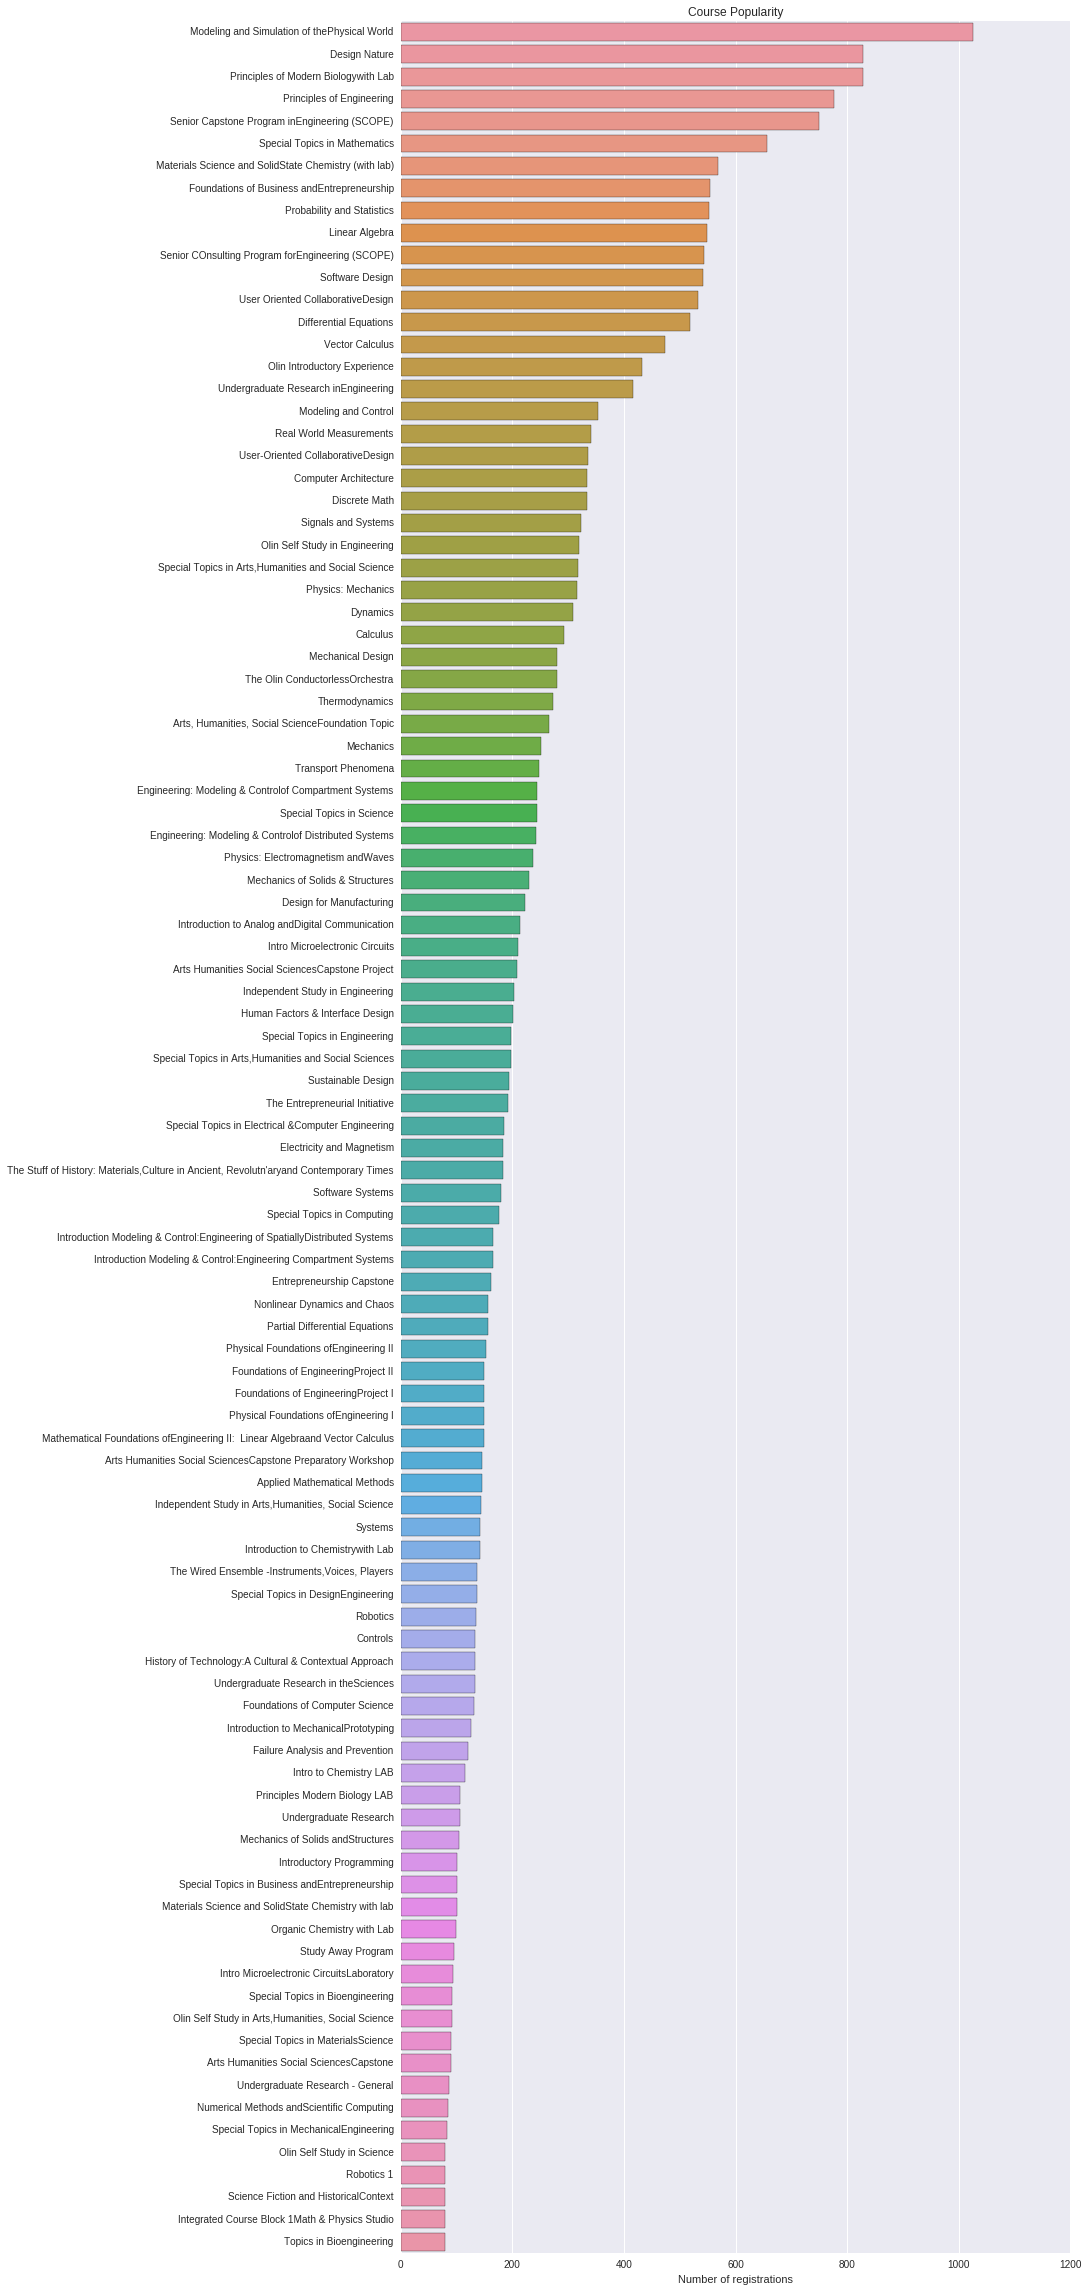

In [9]:
x = sorted_course_sizes.index.values
y = sorted_course_sizes.values

plt.figure(figsize=(12, 40))
sns.barplot(y[:100], x[:100])
plt.xlabel('Number of registrations')
plt.title('Course Popularity')
plt.show()

### Which semseter is each course typically taken?

In [10]:
import math

def grade_to_num(grade):
    if grade == 'FF' or grade == 'FR':
        return 0
    elif grade == 'SO':
        return 1
    elif grade == 'JR':
        return 2
    elif grade == 'SR':
        return 3
    
data['grade_num'] = data.grade.apply(grade_to_num)

def get_counts(grades):
    grades = filter(lambda x: not math.isnan(x), grades)
    grades = [int(grade) for grade in grades]
    
    counts = [0, 0, 0, 0]
    for grade in grades:
        counts[grade] = counts[grade] + 1
    return counts

course_years = data.groupby('course_main').grade_num.agg(lambda x: get_counts(x))
print course_years['Mechanics']

[229, 22, 0, 1]


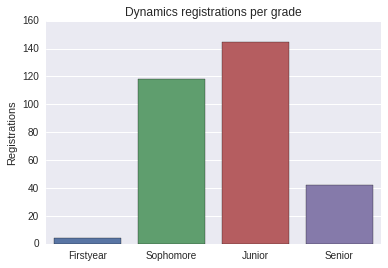

In [12]:
def plot_course_popularity_by_grade(course_name):
    dynamics_years = course_years[course_name]
    year_labels = ['Firstyear', 'Sophomore', 'Junior', 'Senior']

    sns.barplot(year_labels, dynamics_years)
    plt.ylabel('Registrations')
    plt.title(course_name + ' registrations per grade')
    plt.show()
    
plot_course_popularity_by_grade('Dynamics')

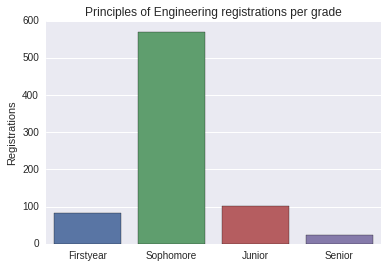

In [13]:
plot_course_popularity_by_grade('Principles of Engineering')

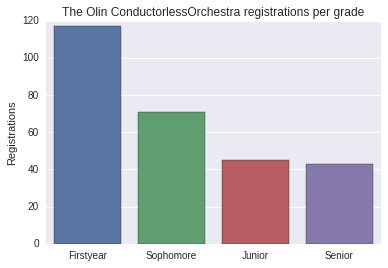

In [15]:
plot_course_popularity_by_grade('The Olin ConductorlessOrchestra')

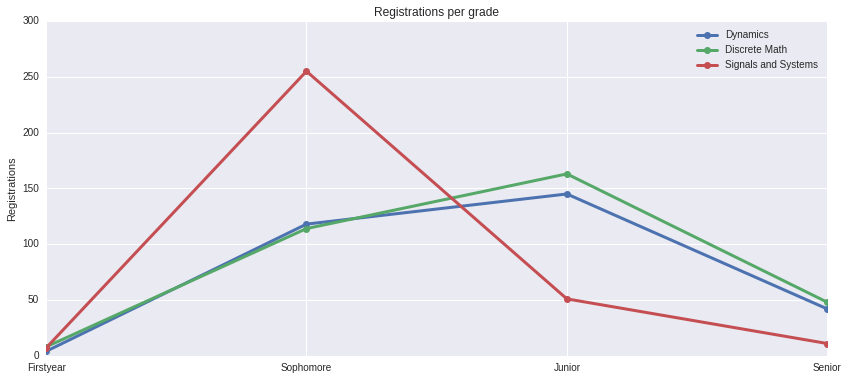

In [46]:
def plot_course_popularity_by_grade_line(course_names):
    plt.figure(figsize=(14, 6))
    year_labels = ['Firstyear', 'Sophomore', 'Junior', 'Senior']
    xticks = range(len(year_labels))
    
    for course_name in course_names:
        year_counts = course_years[course_name]
        plt.plot(xticks, year_counts, '.-', linewidth=3, markersize=14)

    plt.xticks(xticks, year_labels)
    plt.ylabel('Registrations')
    plt.title('Registrations per grade')
    plt.legend(course_names)
    plt.show()
    
plot_course_popularity_by_grade_line(['Dynamics', 'Discrete Math', 'Signals and Systems'])

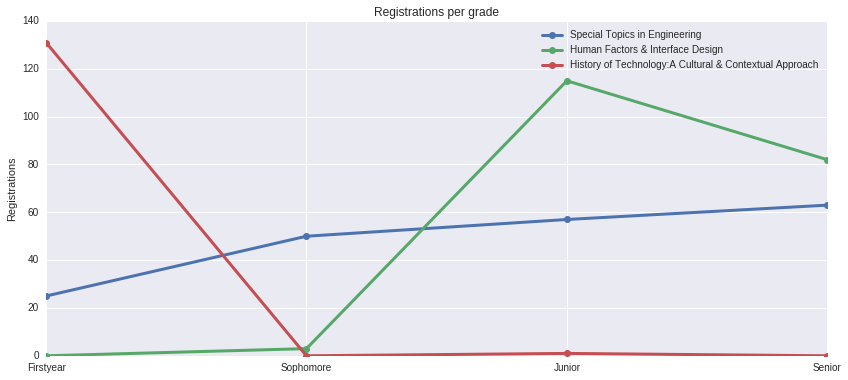

In [95]:
some_courses = data.course_main.sample(3)
plot_course_popularity_by_grade_line(some_courses)

In [119]:
student_majors = data.groupby('id').major_main
for (id, majors) in student_majors:
    majors = majors[majors != 'Undeclared'].values
    
    if majors.any():
        final_major = majors[-1]
    else:
        final_major == 'Undeclared'
    
    data.loc[data.id == id, 'final_major_main'] = final_major
    
data.head()

,status,grad_class,id,semester,sex,grade,major_main,major_sub,code,Unnamed: 9,course_main,course_sub,professor,grade_num,final_major_main
0,GRAD,2007,602,0304FA,M,FF,Undeclared,NaN,AHS1101,2,History and Society,Bodies in Motion: Migration...,"Fleischmann, Fritz",0,Mechanical Engineering
1,GRAD,2007,602,0304FA,M,FF,Undeclared,NaN,FND1210,1,Physical Foundations ofEngineering I,NaN,"Zastavker, Yevgeniya",0,Mechanical Engineering
2,GRAD,2007,602,0304FA,M,FF,Undeclared,NaN,FND1312,1,Mathematical Foundations ofEngineering I: Calc...,NaN,"Tilley, Burt S.",0,Mechanical Engineering
3,GRAD,2007,602,0304FA,M,FF,Undeclared,NaN,FND1410,1,Foundations of EngineeringProject I,Mechanical Nature,"Linder, Benjamin",0,Mechanical Engineering
4,GRAD,2007,602,0304FA,M,FF,Undeclared,NaN,FND1510,3,Intro to Modeling & Control,NaN,"Pratt, Gill",0,Mechanical Engineering


In [120]:
declared = data[(data.final_major_main != 'Undeclared') & (data.final_major_main != 'Exchange Student')]

# major_courses = declared.groupby(['final_major_main', 'grade_num']).course_main
# for ((major, grade), courses) in major_courses:
#     print major, grade
    
#     course_counts = {}
#     for course in courses
#         course_counts[course] = course_counts.get(course, 0) + 1

Electr'l & Computer Engr 0.0
320                                    Arts and Humanities
321                   Physical Foundations ofEngineering I
322      Mathematical Foundations ofEngineering I: Calc...
323                    Foundations of EngineeringProject I
324                            Intro to Modeling & Control
325      History of TechnologyFoundation: Technology, S...
326      Intro Interactive Programming:The Design of So...
327                  Physical Foundations ofEngineering II
328      Mathematical Foundations ofEngineering II:  Li...
329                   Foundations of EngineeringProject II
462      History of Technology:Environment, Culture and...
463                      Engineering of CompartmentSystems
464                                          Design Nature
465                                               Calculus
466                                     Physics: Mechanics
467            Foundations of Business andEntrepreneurship
468                      En